## Work
1. 請比較使用 l1, l1_l2 及不同比例下的訓練結果

In [1]:
import os
from tensorflow import keras
import itertools

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.regularizers import l1_l2
def build_mlp(input_shape,output_units = 10,num_neurons=[512, 256, 128], l1_ratio=0.0,l2_ratio=0.0):
    input_layer = keras.layers.Input(input_shape)
    for i, n_units in enumerate(num_neurons):
        if i == 0:
                x = keras.layers.Dense(units=n_units, 
                                       activation="relu", 
                                       name="hidden_layer"+str(i+1), 
                                       kernel_regularizer=l1_l2(l1=l1_ratio,l2=l2_ratio))(input_layer)
        else:
                x = keras.layers.Dense(units=n_units, 
                                       activation="relu", 
                                       name="hidden_layer"+str(i+1),
                                       kernel_regularizer=l1_l2(l1=l1_ratio,l2=l2_ratio))(x)
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    
    return model

In [6]:
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
L1_EXP = [1e-2, 1e-4, 1e-8, 1e-12, 0.0]
L2_EXP = [1e-2, 1e-4, 1e-8, 1e-12, 0.0]

In [7]:
results = {}

for l1r, l2r in itertools.product(L1_EXP, L2_EXP):
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with L1 = %.6f, L2 = %.6f" % (l1r, l2r))
    model = build_mlp(input_shape=x_train.shape[1:], l1_ratio=l1r, l2_ratio=l2r)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-l1-%s-l2-%s" % (str(l1r), str(l2r))
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with L1 = 0.010000, L2 = 0.010000
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


C:\Users\loe_lin\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/50
196/196 [==============================] - 5s 23ms/step - loss: 197.5785 - accuracy: 0.2318 - val_loss: 35.8328 - val_accuracy: 0.2618
Epoch 2/50
196/196 [==============================] - 4s 22ms/step - loss: 15.8517 - accuracy: 0.1101 - val_loss: 5.1312 - val_accuracy: 0.1000
Epoch 3/50
196/196 [==============================] - 4s 21ms/step - loss: 3.2142 - accuracy: 0.1000 - val_loss: 2.4716 - val_accuracy: 0.1000
Epoch 4/50
196/196 [==============================] - 5s 23ms/step - loss: 2.4632 - accuracy: 0.0988 - val_loss: 2.4623 - val_accuracy: 0.1000
Epoch 5/50
196/196 [==============================] - 5s 23ms/step - loss: 2.4624 - accuracy: 0.0984 - val_loss: 2.4623 - val_accuracy: 0.1000
Epoch 6/50
196/196 [==============================] - 5s 23ms/step - loss: 2.4624 - accuracy: 0.0985 - val_loss: 2.4623 - val_accuracy: 0.1000
Epoch 7/50
196/196 [==============================] - 4s 22ms/step - loss: 2.4624 - accuracy: 0.0961 - val_loss: 2.4623 - val_accuracy: 0.

Epoch 1/50
196/196 [==============================] - 5s 22ms/step - loss: 198.7753 - accuracy: 0.2520 - val_loss: 41.0528 - val_accuracy: 0.2810
Epoch 2/50
196/196 [==============================] - 4s 22ms/step - loss: 19.0564 - accuracy: 0.1157 - val_loss: 7.2429 - val_accuracy: 0.1000
Epoch 3/50
196/196 [==============================] - 4s 21ms/step - loss: 4.0932 - accuracy: 0.0975 - val_loss: 2.6429 - val_accuracy: 0.1000
Epoch 4/50
196/196 [==============================] - 4s 21ms/step - loss: 2.4855 - accuracy: 0.0980 - val_loss: 2.4625 - val_accuracy: 0.1000
Epoch 5/50
196/196 [==============================] - 4s 22ms/step - loss: 2.4626 - accuracy: 0.0974 - val_loss: 2.4625 - val_accuracy: 0.1000
Epoch 6/50
196/196 [==============================] - 4s 21ms/step - loss: 2.4626 - accuracy: 0.0971 - val_loss: 2.4625 - val_accuracy: 0.1000
Epoch 7/50
196/196 [==============================] - 4s 21ms/step - loss: 2.4626 - accuracy: 0.0976 - val_loss: 2.4625 - val_accuracy: 0.

Epoch 1/50
196/196 [==============================] - 5s 23ms/step - loss: 198.6671 - accuracy: 0.2340 - val_loss: 41.1435 - val_accuracy: 0.2439
Epoch 2/50
196/196 [==============================] - 4s 22ms/step - loss: 19.1342 - accuracy: 0.1170 - val_loss: 7.2934 - val_accuracy: 0.1000
Epoch 3/50
196/196 [==============================] - 4s 22ms/step - loss: 4.1142 - accuracy: 0.0974 - val_loss: 2.6501 - val_accuracy: 0.1000
Epoch 4/50
196/196 [==============================] - 4s 22ms/step - loss: 2.4868 - accuracy: 0.0978 - val_loss: 2.4625 - val_accuracy: 0.1000
Epoch 5/50
196/196 [==============================] - 4s 22ms/step - loss: 2.4626 - accuracy: 0.0959 - val_loss: 2.4625 - val_accuracy: 0.1000
Epoch 6/50
196/196 [==============================] - 4s 22ms/step - loss: 2.4626 - accuracy: 0.0974 - val_loss: 2.4625 - val_accuracy: 0.1000
Epoch 7/50
196/196 [==============================] - 4s 22ms/step - loss: 2.4626 - accuracy: 0.0978 - val_loss: 2.4625 - val_accuracy: 0.

Epoch 1/50
196/196 [==============================] - 5s 26ms/step - loss: 198.6250 - accuracy: 0.2540 - val_loss: 41.0673 - val_accuracy: 0.2725
Epoch 2/50
196/196 [==============================] - 5s 26ms/step - loss: 19.0711 - accuracy: 0.1193 - val_loss: 7.2713 - val_accuracy: 0.1000
Epoch 3/50
196/196 [==============================] - 5s 23ms/step - loss: 4.1036 - accuracy: 0.0981 - val_loss: 2.6469 - val_accuracy: 0.1000
Epoch 4/50
196/196 [==============================] - 5s 24ms/step - loss: 2.4862 - accuracy: 0.0987 - val_loss: 2.4627 - val_accuracy: 0.1000
Epoch 5/50
196/196 [==============================] - 4s 22ms/step - loss: 2.4626 - accuracy: 0.0966 - val_loss: 2.4626 - val_accuracy: 0.1000
Epoch 6/50
196/196 [==============================] - 4s 22ms/step - loss: 2.4626 - accuracy: 0.0977 - val_loss: 2.4626 - val_accuracy: 0.1000
Epoch 7/50
196/196 [==============================] - 4s 22ms/step - loss: 2.4626 - accuracy: 0.0977 - val_loss: 2.4626 - val_accuracy: 0.

Epoch 1/50
196/196 [==============================] - 4s 17ms/step - loss: 198.6732 - accuracy: 0.2355 - val_loss: 41.1146 - val_accuracy: 0.2731
Epoch 2/50
196/196 [==============================] - 3s 16ms/step - loss: 19.1135 - accuracy: 0.1149 - val_loss: 7.2971 - val_accuracy: 0.1000
Epoch 3/50
196/196 [==============================] - 3s 17ms/step - loss: 4.1173 - accuracy: 0.0988 - val_loss: 2.6506 - val_accuracy: 0.1000
Epoch 4/50
196/196 [==============================] - 3s 16ms/step - loss: 2.4868 - accuracy: 0.0985 - val_loss: 2.4626 - val_accuracy: 0.1000
Epoch 5/50
196/196 [==============================] - 3s 16ms/step - loss: 2.4626 - accuracy: 0.0977 - val_loss: 2.4626 - val_accuracy: 0.1000
Epoch 6/50
196/196 [==============================] - 3s 16ms/step - loss: 2.4626 - accuracy: 0.1000 - val_loss: 2.4625 - val_accuracy: 0.1000
Epoch 7/50
196/196 [==============================] - 3s 16ms/step - loss: 2.4626 - accuracy: 0.0981 - val_loss: 2.4625 - val_accuracy: 0.

Epoch 1/50
196/196 [==============================] - 5s 23ms/step - loss: 18.8556 - accuracy: 0.2474 - val_loss: 17.4057 - val_accuracy: 0.3245
Epoch 2/50
196/196 [==============================] - 4s 22ms/step - loss: 16.1847 - accuracy: 0.3425 - val_loss: 15.0184 - val_accuracy: 0.3616
Epoch 3/50
196/196 [==============================] - 4s 21ms/step - loss: 13.9923 - accuracy: 0.3663 - val_loss: 13.0084 - val_accuracy: 0.3744
Epoch 4/50
196/196 [==============================] - 4s 22ms/step - loss: 12.1388 - accuracy: 0.3841 - val_loss: 11.3036 - val_accuracy: 0.3919
Epoch 5/50
196/196 [==============================] - 4s 22ms/step - loss: 10.5642 - accuracy: 0.3941 - val_loss: 9.8556 - val_accuracy: 0.3919
Epoch 6/50
196/196 [==============================] - 4s 22ms/step - loss: 9.2230 - accuracy: 0.4020 - val_loss: 8.6149 - val_accuracy: 0.4085
Epoch 7/50
196/196 [==============================] - 4s 22ms/step - loss: 8.0815 - accuracy: 0.4098 - val_loss: 7.5775 - val_accurac

Epoch 1/50
196/196 [==============================] - 5s 25ms/step - loss: 6.1372 - accuracy: 0.2788 - val_loss: 5.9318 - val_accuracy: 0.3481
Epoch 2/50
196/196 [==============================] - 5s 24ms/step - loss: 5.8481 - accuracy: 0.3655 - val_loss: 5.7638 - val_accuracy: 0.3842
Epoch 3/50
196/196 [==============================] - 5s 23ms/step - loss: 5.7007 - accuracy: 0.3911 - val_loss: 5.6469 - val_accuracy: 0.3932
Epoch 4/50
196/196 [==============================] - 5s 23ms/step - loss: 5.5791 - accuracy: 0.4093 - val_loss: 5.5307 - val_accuracy: 0.4202
Epoch 5/50
196/196 [==============================] - 5s 24ms/step - loss: 5.4682 - accuracy: 0.4273 - val_loss: 5.4359 - val_accuracy: 0.4238
Epoch 6/50
196/196 [==============================] - 4s 23ms/step - loss: 5.3645 - accuracy: 0.4389 - val_loss: 5.3203 - val_accuracy: 0.4421
Epoch 7/50
196/196 [==============================] - 5s 23ms/step - loss: 5.2658 - accuracy: 0.4483 - val_loss: 5.2313 - val_accuracy: 0.4481

Epoch 1/50
196/196 [==============================] - 5s 25ms/step - loss: 6.0033 - accuracy: 0.2728 - val_loss: 5.8077 - val_accuracy: 0.3422
Epoch 2/50
196/196 [==============================] - 5s 25ms/step - loss: 5.7190 - accuracy: 0.3614 - val_loss: 5.6376 - val_accuracy: 0.38225.7200 - accuracy: 0.
Epoch 3/50
196/196 [==============================] - 5s 24ms/step - loss: 5.5747 - accuracy: 0.3947 - val_loss: 5.5160 - val_accuracy: 0.4032 - accuracy:  - ETA: 1s - ETA: 0s - loss: 5.582
Epoch 4/50
196/196 [==============================] - 5s 23ms/step - loss: 5.4544 - accuracy: 0.4141 - val_loss: 5.4025 - val_accuracy: 0.4236- loss: 5.4544 - accuracy: 0.41
Epoch 5/50
196/196 [==============================] - 5s 23ms/step - loss: 5.3447 - accuracy: 0.4304 - val_loss: 5.3092 - val_accuracy: 0.4262
Epoch 6/50
196/196 [==============================] - 5s 24ms/step - loss: 5.2447 - accuracy: 0.4436 - val_loss: 5.2165 - val_accuracy: 0.4380
Epoch 7/50
196/196 [=======================

Epoch 1/50
196/196 [==============================] - 6s 23ms/step - loss: 6.0061 - accuracy: 0.2813 - val_loss: 5.8055 - val_accuracy: 0.3443
Epoch 2/50
196/196 [==============================] - 5s 24ms/step - loss: 5.7193 - accuracy: 0.3663 - val_loss: 5.6369 - val_accuracy: 0.3852
Epoch 3/50
196/196 [==============================] - 4s 21ms/step - loss: 5.5725 - accuracy: 0.3965 - val_loss: 5.5106 - val_accuracy: 0.4088
Epoch 4/50
196/196 [==============================] - 4s 22ms/step - loss: 5.4511 - accuracy: 0.4179 - val_loss: 5.3986 - val_accuracy: 0.4203
Epoch 5/50
196/196 [==============================] - 4s 22ms/step - loss: 5.3420 - accuracy: 0.4317 - val_loss: 5.3031 - val_accuracy: 0.4367
Epoch 6/50
196/196 [==============================] - 4s 22ms/step - loss: 5.2409 - accuracy: 0.4467 - val_loss: 5.2074 - val_accuracy: 0.4429
Epoch 7/50
196/196 [==============================] - 5s 23ms/step - loss: 5.1463 - accuracy: 0.4567 - val_loss: 5.1095 - val_accuracy: 0.4566

Epoch 1/50
196/196 [==============================] - 4s 19ms/step - loss: 6.0458 - accuracy: 0.2649 - val_loss: 5.8315 - val_accuracy: 0.3449
Epoch 2/50
196/196 [==============================] - 3s 17ms/step - loss: 5.7325 - accuracy: 0.3639 - val_loss: 5.6499 - val_accuracy: 0.3808
Epoch 3/50
196/196 [==============================] - 3s 18ms/step - loss: 5.5794 - accuracy: 0.3959 - val_loss: 5.5154 - val_accuracy: 0.4059
Epoch 4/50
196/196 [==============================] - 3s 17ms/step - loss: 5.4563 - accuracy: 0.4178 - val_loss: 5.4053 - val_accuracy: 0.4252
Epoch 5/50
196/196 [==============================] - 3s 17ms/step - loss: 5.3467 - accuracy: 0.4333 - val_loss: 5.2996 - val_accuracy: 0.4327
Epoch 6/50
196/196 [==============================] - 3s 18ms/step - loss: 5.2455 - accuracy: 0.4475 - val_loss: 5.2092 - val_accuracy: 0.4406
Epoch 7/50
196/196 [==============================] - 3s 17ms/step - loss: 5.1510 - accuracy: 0.4569 - val_loss: 5.1108 - val_accuracy: 0.4544

Epoch 1/50
196/196 [==============================] - 5s 24ms/step - loss: 15.0888 - accuracy: 0.2686 - val_loss: 13.9516 - val_accuracy: 0.3349
Epoch 2/50
196/196 [==============================] - 5s 23ms/step - loss: 13.0190 - accuracy: 0.3554 - val_loss: 12.1278 - val_accuracy: 0.3678
Epoch 3/50
196/196 [==============================] - 5s 23ms/step - loss: 11.3461 - accuracy: 0.3775 - val_loss: 10.5995 - val_accuracy: 0.3853
Epoch 4/50
196/196 [==============================] - 5s 24ms/step - loss: 9.9334 - accuracy: 0.3938 - val_loss: 9.2970 - val_accuracy: 0.3941
Epoch 5/50
196/196 [==============================] - 5s 23ms/step - loss: 8.7335 - accuracy: 0.4029 - val_loss: 8.1913 - val_accuracy: 0.4047
Epoch 6/50
196/196 [==============================] - 5s 23ms/step - loss: 7.7098 - accuracy: 0.4122 - val_loss: 7.2462 - val_accuracy: 0.4205
Epoch 7/50
196/196 [==============================] - 4s 23ms/step - loss: 6.8384 - accuracy: 0.4205 - val_loss: 6.4465 - val_accuracy: 

Epoch 1/50
196/196 [==============================] - 5s 25ms/step - loss: 2.1940 - accuracy: 0.2690 - val_loss: 2.0203 - val_accuracy: 0.3382
Epoch 2/50
196/196 [==============================] - 5s 23ms/step - loss: 1.9604 - accuracy: 0.3626 - val_loss: 1.9079 - val_accuracy: 0.3725
Epoch 3/50
196/196 [==============================] - 5s 24ms/step - loss: 1.8708 - accuracy: 0.3938 - val_loss: 1.8377 - val_accuracy: 0.4068
Epoch 4/50
196/196 [==============================] - 5s 23ms/step - loss: 1.8107 - accuracy: 0.4153 - val_loss: 1.7865 - val_accuracy: 0.4185
Epoch 5/50
196/196 [==============================] - 5s 23ms/step - loss: 1.7627 - accuracy: 0.4321 - val_loss: 1.7503 - val_accuracy: 0.4313
Epoch 6/50
196/196 [==============================] - 5s 24ms/step - loss: 1.7223 - accuracy: 0.4444 - val_loss: 1.7104 - val_accuracy: 0.4514
Epoch 7/50
196/196 [==============================] - 5s 24ms/step - loss: 1.6881 - accuracy: 0.4576 - val_loss: 1.7006 - val_accuracy: 0.4454

Epoch 1/50
196/196 [==============================] - 5s 24ms/step - loss: 2.0299 - accuracy: 0.2730 - val_loss: 1.8695 - val_accuracy: 0.3405
Epoch 2/50
196/196 [==============================] - 5s 23ms/step - loss: 1.8072 - accuracy: 0.3688 - val_loss: 1.7480 - val_accuracy: 0.3933
Epoch 3/50
196/196 [==============================] - 5s 24ms/step - loss: 1.7151 - accuracy: 0.3991 - val_loss: 1.7029 - val_accuracy: 0.3888
Epoch 4/50
196/196 [==============================] - 5s 24ms/step - loss: 1.6567 - accuracy: 0.4211 - val_loss: 1.6398 - val_accuracy: 0.4284
Epoch 5/50
196/196 [==============================] - 5s 23ms/step - loss: 1.6105 - accuracy: 0.4366 - val_loss: 1.6059 - val_accuracy: 0.4381
Epoch 6/50
196/196 [==============================] - 5s 23ms/step - loss: 1.5724 - accuracy: 0.4524 - val_loss: 1.5821 - val_accuracy: 0.4421
Epoch 7/50
196/196 [==============================] - 5s 23ms/step - loss: 1.5388 - accuracy: 0.4608 - val_loss: 1.5428 - val_accuracy: 0.4546

Epoch 1/50
196/196 [==============================] - 5s 25ms/step - loss: 2.0595 - accuracy: 0.2645 - val_loss: 1.9011 - val_accuracy: 0.3205
Epoch 2/50
196/196 [==============================] - 5s 24ms/step - loss: 1.8229 - accuracy: 0.3612 - val_loss: 1.7687 - val_accuracy: 0.3751
Epoch 3/50
196/196 [==============================] - 5s 24ms/step - loss: 1.7317 - accuracy: 0.3931 - val_loss: 1.6960 - val_accuracy: 0.4018
Epoch 4/50
196/196 [==============================] - 5s 24ms/step - loss: 1.6706 - accuracy: 0.4159 - val_loss: 1.6423 - val_accuracy: 0.4243
Epoch 5/50
196/196 [==============================] - 5s 24ms/step - loss: 1.6229 - accuracy: 0.4314 - val_loss: 1.6047 - val_accuracy: 0.4356
Epoch 6/50
196/196 [==============================] - 5s 24ms/step - loss: 1.5835 - accuracy: 0.4444 - val_loss: 1.5804 - val_accuracy: 0.4421
Epoch 7/50
196/196 [==============================] - 5s 23ms/step - loss: 1.5520 - accuracy: 0.4543 - val_loss: 1.5472 - val_accuracy: 0.4542

Epoch 1/50
196/196 [==============================] - 4s 19ms/step - loss: 2.0321 - accuracy: 0.2776 - val_loss: 1.8708 - val_accuracy: 0.3379
Epoch 2/50
196/196 [==============================] - 4s 18ms/step - loss: 1.8096 - accuracy: 0.3657 - val_loss: 1.7656 - val_accuracy: 0.3798
Epoch 3/50
196/196 [==============================] - 4s 21ms/step - loss: 1.7329 - accuracy: 0.3933 - val_loss: 1.6989 - val_accuracy: 0.4053
Epoch 4/50
196/196 [==============================] - 4s 20ms/step - loss: 1.6772 - accuracy: 0.4125 - val_loss: 1.6558 - val_accuracy: 0.4193
Epoch 5/50
196/196 [==============================] - 4s 19ms/step - loss: 1.6315 - accuracy: 0.4292 - val_loss: 1.6242 - val_accuracy: 0.4278
Epoch 6/50
196/196 [==============================] - 3s 18ms/step - loss: 1.5917 - accuracy: 0.4430 - val_loss: 1.6009 - val_accuracy: 0.4315
Epoch 7/50
196/196 [==============================] - 3s 18ms/step - loss: 1.5567 - accuracy: 0.4529 - val_loss: 1.5533 - val_accuracy: 0.4495

Epoch 1/50
196/196 [==============================] - 5s 26ms/step - loss: 15.0653 - accuracy: 0.2810 - val_loss: 13.9232 - val_accuracy: 0.3541
Epoch 2/50
196/196 [==============================] - 5s 24ms/step - loss: 12.9982 - accuracy: 0.3626 - val_loss: 12.1036 - val_accuracy: 0.3868
Epoch 3/50
196/196 [==============================] - 5s 26ms/step - loss: 11.3267 - accuracy: 0.3877 - val_loss: 10.5721 - val_accuracy: 0.3979
Epoch 4/50
196/196 [==============================] - 5s 25ms/step - loss: 9.9151 - accuracy: 0.4025 - val_loss: 9.2798 - val_accuracy: 0.4061
Epoch 5/50
196/196 [==============================] - 5s 25ms/step - loss: 8.7165 - accuracy: 0.4136 - val_loss: 8.1723 - val_accuracy: 0.4139
Epoch 6/50
196/196 [==============================] - 5s 25ms/step - loss: 7.6932 - accuracy: 0.4201 - val_loss: 7.2317 - val_accuracy: 0.4226
Epoch 7/50
196/196 [==============================] - 5s 25ms/step - loss: 6.8224 - accuracy: 0.4272 - val_loss: 6.4308 - val_accuracy: 

Epoch 1/50
196/196 [==============================] - 5s 25ms/step - loss: 2.1619 - accuracy: 0.2763 - val_loss: 1.9980 - val_accuracy: 0.3524
Epoch 2/50
196/196 [==============================] - 5s 25ms/step - loss: 1.9460 - accuracy: 0.3667 - val_loss: 1.9024 - val_accuracy: 0.3824
Epoch 3/50
196/196 [==============================] - 5s 24ms/step - loss: 1.8631 - accuracy: 0.3959 - val_loss: 1.8393 - val_accuracy: 0.3979
Epoch 4/50
196/196 [==============================] - 5s 25ms/step - loss: 1.8041 - accuracy: 0.4181 - val_loss: 1.7835 - val_accuracy: 0.4271
Epoch 5/50
196/196 [==============================] - 5s 25ms/step - loss: 1.7554 - accuracy: 0.4337 - val_loss: 1.7488 - val_accuracy: 0.4353
Epoch 6/50
196/196 [==============================] - 5s 24ms/step - loss: 1.7155 - accuracy: 0.4489 - val_loss: 1.7114 - val_accuracy: 0.4453
Epoch 7/50
196/196 [==============================] - 5s 24ms/step - loss: 1.6814 - accuracy: 0.4602 - val_loss: 1.6899 - val_accuracy: 0.4534

Epoch 1/50
196/196 [==============================] - 6s 27ms/step - loss: 2.0338 - accuracy: 0.2774 - val_loss: 1.8603 - val_accuracy: 0.3487
Epoch 2/50
196/196 [==============================] - 5s 26ms/step - loss: 1.7976 - accuracy: 0.3664 - val_loss: 1.7406 - val_accuracy: 0.3901
Epoch 3/50
196/196 [==============================] - 5s 24ms/step - loss: 1.7129 - accuracy: 0.3975 - val_loss: 1.6820 - val_accuracy: 0.4169
Epoch 4/50
196/196 [==============================] - 4s 22ms/step - loss: 1.6533 - accuracy: 0.4202 - val_loss: 1.6379 - val_accuracy: 0.4215
Epoch 5/50
196/196 [==============================] - 4s 22ms/step - loss: 1.6065 - accuracy: 0.4384 - val_loss: 1.5994 - val_accuracy: 0.4431
Epoch 6/50
196/196 [==============================] - 4s 22ms/step - loss: 1.5684 - accuracy: 0.4497 - val_loss: 1.5597 - val_accuracy: 0.4487
Epoch 7/50
196/196 [==============================] - 4s 22ms/step - loss: 1.5355 - accuracy: 0.4611 - val_loss: 1.5339 - val_accuracy: 0.4572

Epoch 1/50
196/196 [==============================] - 5s 23ms/step - loss: 2.0102 - accuracy: 0.2818 - val_loss: 1.8557 - val_accuracy: 0.3465
Epoch 2/50
196/196 [==============================] - 4s 22ms/step - loss: 1.8045 - accuracy: 0.3659 - val_loss: 1.7668 - val_accuracy: 0.3802
Epoch 3/50
196/196 [==============================] - 4s 22ms/step - loss: 1.7261 - accuracy: 0.3948 - val_loss: 1.6978 - val_accuracy: 0.4053
Epoch 4/50
196/196 [==============================] - 4s 22ms/step - loss: 1.6681 - accuracy: 0.4141 - val_loss: 1.6466 - val_accuracy: 0.4237
Epoch 5/50
196/196 [==============================] - 4s 22ms/step - loss: 1.6186 - accuracy: 0.4336 - val_loss: 1.5999 - val_accuracy: 0.4340
Epoch 6/50
196/196 [==============================] - 4s 21ms/step - loss: 1.5775 - accuracy: 0.4477 - val_loss: 1.5697 - val_accuracy: 0.4450
Epoch 7/50
196/196 [==============================] - 4s 22ms/step - loss: 1.5428 - accuracy: 0.4587 - val_loss: 1.5452 - val_accuracy: 0.4585

Epoch 1/50
196/196 [==============================] - 4s 17ms/step - loss: 2.0424 - accuracy: 0.2697 - val_loss: 1.8702 - val_accuracy: 0.3462
Epoch 2/50
196/196 [==============================] - 3s 16ms/step - loss: 1.8061 - accuracy: 0.3677 - val_loss: 1.7583 - val_accuracy: 0.3804
Epoch 3/50
196/196 [==============================] - 3s 16ms/step - loss: 1.7214 - accuracy: 0.3957 - val_loss: 1.6882 - val_accuracy: 0.4060
Epoch 4/50
196/196 [==============================] - 3s 16ms/step - loss: 1.6626 - accuracy: 0.4175 - val_loss: 1.6429 - val_accuracy: 0.4271
Epoch 5/50
196/196 [==============================] - 3s 16ms/step - loss: 1.6141 - accuracy: 0.4346 - val_loss: 1.6263 - val_accuracy: 0.4268
Epoch 6/50
196/196 [==============================] - 3s 17ms/step - loss: 1.5757 - accuracy: 0.4468 - val_loss: 1.5649 - val_accuracy: 0.4526
Epoch 7/50
196/196 [==============================] - 3s 16ms/step - loss: 1.5400 - accuracy: 0.4602 - val_loss: 1.5439 - val_accuracy: 0.4549

Epoch 1/50
196/196 [==============================] - 4s 19ms/step - loss: 15.0895 - accuracy: 0.2699 - val_loss: 13.9584 - val_accuracy: 0.3374
Epoch 2/50
196/196 [==============================] - 3s 17ms/step - loss: 13.0233 - accuracy: 0.3577 - val_loss: 12.1289 - val_accuracy: 0.3710
Epoch 3/50
196/196 [==============================] - 3s 18ms/step - loss: 11.3494 - accuracy: 0.3816 - val_loss: 10.6020 - val_accuracy: 0.3822
Epoch 4/50
196/196 [==============================] - 3s 18ms/step - loss: 9.9359 - accuracy: 0.3940 - val_loss: 9.3038 - val_accuracy: 0.3997
Epoch 5/50
196/196 [==============================] - 3s 18ms/step - loss: 8.7353 - accuracy: 0.4057 - val_loss: 8.1911 - val_accuracy: 0.4117
Epoch 6/50
196/196 [==============================] - 3s 17ms/step - loss: 7.7139 - accuracy: 0.4138 - val_loss: 7.2517 - val_accuracy: 0.4143
Epoch 7/50
196/196 [==============================] - 3s 17ms/step - loss: 6.8426 - accuracy: 0.4190 - val_loss: 6.4492 - val_accuracy: 

Epoch 1/50
196/196 [==============================] - 4s 17ms/step - loss: 2.1789 - accuracy: 0.2701 - val_loss: 2.0166 - val_accuracy: 0.3367
Epoch 2/50
196/196 [==============================] - 3s 16ms/step - loss: 1.9484 - accuracy: 0.3623 - val_loss: 1.8955 - val_accuracy: 0.3866
Epoch 3/50
196/196 [==============================] - 3s 16ms/step - loss: 1.8589 - accuracy: 0.3957 - val_loss: 1.8244 - val_accuracy: 0.4108
Epoch 4/50
196/196 [==============================] - 3s 17ms/step - loss: 1.8002 - accuracy: 0.4172 - val_loss: 1.7841 - val_accuracy: 0.4237
Epoch 5/50
196/196 [==============================] - 3s 16ms/step - loss: 1.7535 - accuracy: 0.4326 - val_loss: 1.7408 - val_accuracy: 0.4392
Epoch 6/50
196/196 [==============================] - 3s 16ms/step - loss: 1.7146 - accuracy: 0.4462 - val_loss: 1.7106 - val_accuracy: 0.4461
Epoch 7/50
196/196 [==============================] - 3s 16ms/step - loss: 1.6814 - accuracy: 0.4595 - val_loss: 1.6941 - val_accuracy: 0.4563

Epoch 1/50
196/196 [==============================] - 4s 18ms/step - loss: 2.0034 - accuracy: 0.2851 - val_loss: 1.8518 - val_accuracy: 0.3550
Epoch 2/50
196/196 [==============================] - 3s 18ms/step - loss: 1.7930 - accuracy: 0.3718 - val_loss: 1.7422 - val_accuracy: 0.3898
Epoch 3/50
196/196 [==============================] - 3s 17ms/step - loss: 1.7091 - accuracy: 0.4011 - val_loss: 1.6766 - val_accuracy: 0.4156
Epoch 4/50
196/196 [==============================] - 3s 17ms/step - loss: 1.6496 - accuracy: 0.4216 - val_loss: 1.6355 - val_accuracy: 0.4244
Epoch 5/50
196/196 [==============================] - 3s 17ms/step - loss: 1.6052 - accuracy: 0.4386 - val_loss: 1.5915 - val_accuracy: 0.4449
Epoch 6/50
196/196 [==============================] - 3s 18ms/step - loss: 1.5665 - accuracy: 0.4520 - val_loss: 1.5673 - val_accuracy: 0.4535
Epoch 7/50
196/196 [==============================] - 3s 17ms/step - loss: 1.5333 - accuracy: 0.4648 - val_loss: 1.5373 - val_accuracy: 0.4623

Epoch 1/50
196/196 [==============================] - 4s 20ms/step - loss: 2.0262 - accuracy: 0.2748 - val_loss: 1.8669 - val_accuracy: 0.3436
Epoch 2/50
196/196 [==============================] - 4s 19ms/step - loss: 1.8072 - accuracy: 0.3637 - val_loss: 1.7567 - val_accuracy: 0.3809
Epoch 3/50
196/196 [==============================] - 4s 20ms/step - loss: 1.7236 - accuracy: 0.3969 - val_loss: 1.6941 - val_accuracy: 0.4043
Epoch 4/50
196/196 [==============================] - 4s 19ms/step - loss: 1.6664 - accuracy: 0.4161 - val_loss: 1.6458 - val_accuracy: 0.4226
Epoch 5/50
196/196 [==============================] - 4s 18ms/step - loss: 1.6212 - accuracy: 0.4324 - val_loss: 1.6128 - val_accuracy: 0.4295
Epoch 6/50
196/196 [==============================] - 4s 19ms/step - loss: 1.5819 - accuracy: 0.4449 - val_loss: 1.5839 - val_accuracy: 0.4408
Epoch 7/50
196/196 [==============================] - 4s 19ms/step - loss: 1.5485 - accuracy: 0.4568 - val_loss: 1.5530 - val_accuracy: 0.4512

Epoch 1/50
196/196 [==============================] - 3s 14ms/step - loss: 2.0486 - accuracy: 0.2686 - val_loss: 1.8749 - val_accuracy: 0.3364
Epoch 2/50
196/196 [==============================] - 3s 14ms/step - loss: 1.8175 - accuracy: 0.3624 - val_loss: 1.7744 - val_accuracy: 0.3753
Epoch 3/50
196/196 [==============================] - 3s 13ms/step - loss: 1.7317 - accuracy: 0.3943 - val_loss: 1.7086 - val_accuracy: 0.3941
Epoch 4/50
196/196 [==============================] - 3s 13ms/step - loss: 1.6721 - accuracy: 0.4144 - val_loss: 1.6464 - val_accuracy: 0.4208
Epoch 5/50
196/196 [==============================] - 3s 15ms/step - loss: 1.6230 - accuracy: 0.4311 - val_loss: 1.6056 - val_accuracy: 0.4349
Epoch 6/50
196/196 [==============================] - 3s 16ms/step - loss: 1.5816 - accuracy: 0.4454 - val_loss: 1.5759 - val_accuracy: 0.4421
Epoch 7/50
196/196 [==============================] - 3s 13ms/step - loss: 1.5481 - accuracy: 0.4573 - val_loss: 1.5468 - val_accuracy: 0.4556

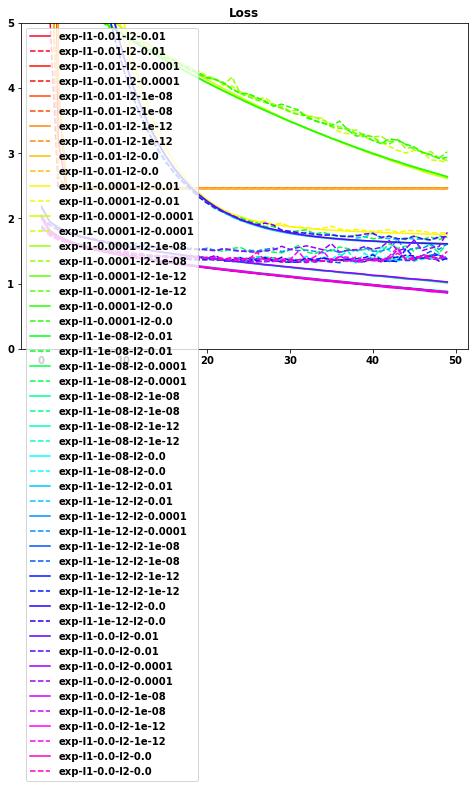

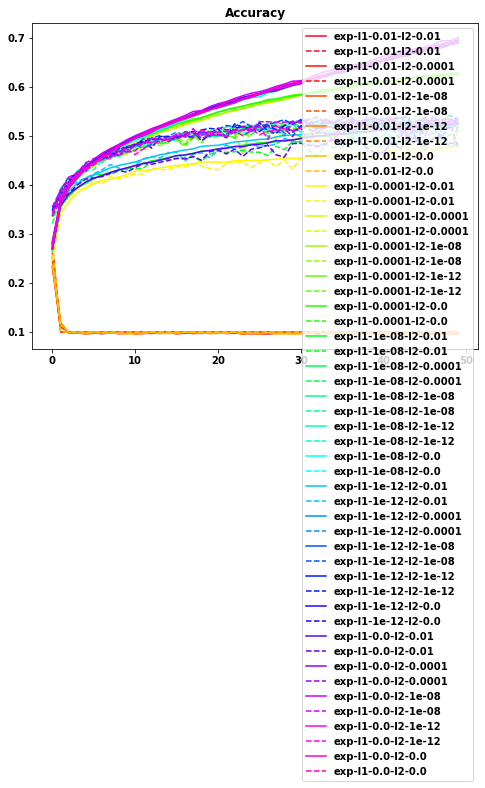

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib.cm as mplcm
import matplotlib.colors as colors
NUM_COLORS = 25

cm = plt.get_cmap('gist_rainbow')
cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)
color_bar = [scalarMap.to_rgba(i) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()